# Comparative Impact Analysis of Proposed Endoscopy Sites by Cluster Count (k = 3 to 7)

This notebook evaluates the spatial and service impact of proposed endoscopy sites generated via clustering underserved LSOAs with cluster counts ranging from 3 to 7. It compares how cluster resolution affects:

- Geographic coverage and distribution of proposed sites
- Accessibility improvements measured by reachable endoscopy rooms within 60 minutes
- Competition-adjusted service capacity per 100k population aged 50–74
- Accessibility tier changes (Low, Marginal, Adequate, No Access)

The analysis informs the choice of cluster number for strategic planning of new facilities balancing coverage, efficiency, and equity.

---


In [1]:
# ----------------------------------------------------------
# Step 0 – Imports, File Paths, and Script Path Setup
# ----------------------------------------------------------

import os
import sys
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Optional display settings
import warnings
warnings.filterwarnings("ignore")

# Add custom script directory to system path if needed
script_dir = "/Users/rosstaylor/Downloads/Research Project/Code Folder/diagnostic-modality-demand/diagnostic-modality-demand/scripts"
if script_dir not in sys.path:
    sys.path.append(script_dir)

# Define base data directories
base_dir = "/Users/rosstaylor/Downloads/Research Project/Code Folder/diagnostic-modality-demand/diagnostic-modality-demand"
data_dir = os.path.join(base_dir, "data", "raw")
proc_dir = os.path.join(base_dir, "data", "processed", "endoscopy")
modality_dir = os.path.join(data_dir, "modality_modelling")

# File paths
gpkg_path = os.path.join(data_dir, "LSOA_5-year_segment_master.gpkg")
travel_csv_path = os.path.join(data_dir, "LSOA_to_LSOA_complete.csv")
modality_counts_path = os.path.join(data_dir, "modality_procedure_counts_by_age_band_2024.csv")
facilities_path = os.path.join(proc_dir, "facilities_with_proposed_sites.gpkg")

# Define paths to all versions
baseline_path = os.path.join(proc_dir, "facilities_with_geometry.gpkg")
scenario_files = {
    "V3": os.path.join(proc_dir, "facilities_with_proposed_sites_k3.gpkg"),
    "V4": os.path.join(proc_dir, "facilities_with_proposed_sites_k4.gpkg"),
    "V5": os.path.join(proc_dir, "facilities_with_proposed_sites_k5.gpkg"),
    "V6": os.path.join(proc_dir, "facilities_with_proposed_sites_k6.gpkg"),
    "V7": os.path.join(proc_dir, "facilities_with_proposed_sites_k7.gpkg"),
}


In [2]:
# -------------------------------
# Load Baseline Facilities
# -------------------------------

print("\nLoading Baseline facilities...")

baseline_path = os.path.join(proc_dir, "facilities_with_geometry.gpkg")
baseline_gdf = gpd.read_file(baseline_path)

# Filter and clean
baseline_gdf = baseline_gdf[baseline_gdf["Endoscopy Rooms"] >= 1].copy()
baseline_gdf["lsoa21cd"] = baseline_gdf["lsoa21cd"].astype(str)
baseline_gdf["Endoscopy Rooms"] = baseline_gdf["Endoscopy Rooms"].astype(float)

# Preview
print(f"→ {len(baseline_gdf)} facilities in Baseline")
display(baseline_gdf[["Name", "Endoscopy Rooms", "source", "lsoa21cd"]].head())

# -------------------------------
# Load Facilities per Scenario and Combine with Baseline
# -------------------------------

facilities_by_scenario = {
    "Baseline": baseline_gdf  # Start with just the baseline
}

for scen, path in scenario_files.items():
    print(f"\nLoading facilities for {scen}...")

    # Load proposed-only GPKG
    proposed_gdf = gpd.read_file(path)
    proposed_gdf = proposed_gdf[proposed_gdf["Endoscopy Rooms"] >= 1].copy()
    proposed_gdf["lsoa21cd"] = proposed_gdf["lsoa21cd"].astype(str)
    proposed_gdf["Endoscopy Rooms"] = proposed_gdf["Endoscopy Rooms"].astype(float)

    # Combine with baseline
    combined_gdf = pd.concat([baseline_gdf, proposed_gdf], ignore_index=True)

    # Store
    facilities_by_scenario[scen] = combined_gdf

    print(f"→ {len(combined_gdf)} total facilities in {scen} (including Baseline)")
    display(combined_gdf[["Name", "Endoscopy Rooms", "source", "lsoa21cd"]].head())



Loading Baseline facilities...
→ 32 facilities in Baseline


,Name,Endoscopy Rooms,source,lsoa21cd
0,Bsw Banes Locality CDC,3.0,CDC,E01014444
1,North Bristol CDC,3.0,CDC,E01014861
2,Devon Exeter Nightingale CDC,1.0,CDC,E01033234
3,Dorset Health Village Poole CDC,4.0,CDC,E01034281
4,Bridgewater CDC,2.0,CDC,E01035115



Loading facilities for V3...
→ 35 total facilities in V3 (including Baseline)


,Name,Endoscopy Rooms,source,lsoa21cd
0,Bsw Banes Locality CDC,3.0,CDC,E01014444
1,North Bristol CDC,3.0,CDC,E01014861
2,Devon Exeter Nightingale CDC,1.0,CDC,E01033234
3,Dorset Health Village Poole CDC,4.0,CDC,E01034281
4,Bridgewater CDC,2.0,CDC,E01035115



Loading facilities for V4...
→ 36 total facilities in V4 (including Baseline)


,Name,Endoscopy Rooms,source,lsoa21cd
0,Bsw Banes Locality CDC,3.0,CDC,E01014444
1,North Bristol CDC,3.0,CDC,E01014861
2,Devon Exeter Nightingale CDC,1.0,CDC,E01033234
3,Dorset Health Village Poole CDC,4.0,CDC,E01034281
4,Bridgewater CDC,2.0,CDC,E01035115



Loading facilities for V5...
→ 37 total facilities in V5 (including Baseline)


,Name,Endoscopy Rooms,source,lsoa21cd
0,Bsw Banes Locality CDC,3.0,CDC,E01014444
1,North Bristol CDC,3.0,CDC,E01014861
2,Devon Exeter Nightingale CDC,1.0,CDC,E01033234
3,Dorset Health Village Poole CDC,4.0,CDC,E01034281
4,Bridgewater CDC,2.0,CDC,E01035115



Loading facilities for V6...
→ 38 total facilities in V6 (including Baseline)


,Name,Endoscopy Rooms,source,lsoa21cd
0,Bsw Banes Locality CDC,3.0,CDC,E01014444
1,North Bristol CDC,3.0,CDC,E01014861
2,Devon Exeter Nightingale CDC,1.0,CDC,E01033234
3,Dorset Health Village Poole CDC,4.0,CDC,E01034281
4,Bridgewater CDC,2.0,CDC,E01035115



Loading facilities for V7...
→ 39 total facilities in V7 (including Baseline)


,Name,Endoscopy Rooms,source,lsoa21cd
0,Bsw Banes Locality CDC,3.0,CDC,E01014444
1,North Bristol CDC,3.0,CDC,E01014861
2,Devon Exeter Nightingale CDC,1.0,CDC,E01033234
3,Dorset Health Village Poole CDC,4.0,CDC,E01034281
4,Bridgewater CDC,2.0,CDC,E01035115


In [3]:
# ----------------------------------------------------------
# Step 2 – Load LSOA Population Data (Age 50–74) from GPKG
# ----------------------------------------------------------

# Load full LSOA demographic GeoDataFrame
lsoa_gdf = gpd.read_file(gpkg_path)

# Define required 5-year age columns for age 50–74
age_cols_50_74 = ["age_50_54", "age_55_59", "age_60_64", "age_65_69", "age_70_74"]

# Validate column presence
missing_cols = [col for col in age_cols_50_74 if col not in lsoa_gdf.columns]
if missing_cols:
    raise ValueError(f"Missing expected age columns: {missing_cols}")

# Calculate total population aged 50–74
lsoa_gdf["pop_50_74"] = lsoa_gdf[age_cols_50_74].sum(axis=1)

# Create simplified version for joining
lsoa_pop = lsoa_gdf[["lsoa21cd", "pop_50_74", "geometry"]].copy()
lsoa_pop["lsoa21cd"] = lsoa_pop["lsoa21cd"].astype(str)

# Preview result
print(f"LSOA population GeoDataFrame loaded: {lsoa_pop.shape[0]} rows")
display(lsoa_pop.head())


LSOA population GeoDataFrame loaded: 3451 rows


,lsoa21cd,pop_50_74,geometry
0,E01020484,568.83,"MULTIPOLYGON (((401918.077 78945.278, 401919.4..."
1,E01020481,643.13,"MULTIPOLYGON (((403211.07 78762.983, 403211.07..."
2,E01020482,608.53,"MULTIPOLYGON (((403126.904 78828.641, 403127.4..."
3,E01020479,419.26,"MULTIPOLYGON (((403027.597 79673.678, 403027.8..."
4,E01020478,464.03,"MULTIPOLYGON (((402493.1 79584.202, 402511.903..."


In [4]:
# ----------------------------------------------------------
# Step 3 – Load and Filter Travel Matrix per Scenario (< 60 Minutes by Car)
# ----------------------------------------------------------

# Load full travel matrix once
travel_df = pd.read_csv(travel_csv_path)

# Ensure clean types
travel_df["origin_name"] = travel_df["origin_name"].astype(str)
travel_df["destination_name"] = travel_df["destination_name"].astype(str)

# Prepare dictionary to store filtered travel matrices (including Baseline)
travel_by_scenario = {}

for scen, fac_gdf in facilities_by_scenario.items():
    print(f"\nProcessing travel matrix for {scen}...")

    # Extract valid destination LSOAs for this scenario
    valid_dest_lsoas = fac_gdf["lsoa21cd"].unique()

    # Filter travel matrix
    df = travel_df[
        (travel_df["destination_name"].isin(valid_dest_lsoas)) &
        (travel_df["travel_time_car"] < 60)
    ].copy()

    # Store filtered matrix
    travel_by_scenario[scen] = df

    # Confirm output
    print(f"  → {df.shape[0]:,} OD pairs retained (<60 mins to valid facility)")
    print(f"  → Max car travel time: {df['travel_time_car'].max():.2f} minutes")
    display(df.head())



Processing travel matrix for Baseline...
  → 18,398 OD pairs retained (<60 mins to valid facility)
  → Max car travel time: 60.00 minutes


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak
1471,E01018785,E01015092,29.387906,64.517906,64.517906
1701,E01032060,E01014444,20.838899,65.488899,65.488899
1761,E01032069,E01014444,42.010978,93.380978,93.380978
2324,E01031988,E01015547,52.158058,119.278058,119.278058
2657,E01019937,E01020048,41.601568,88.661568,88.661568



Processing travel matrix for V3...
  → 20,466 OD pairs retained (<60 mins to valid facility)
  → Max car travel time: 60.00 minutes


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak
643,E01020158,E01018787,33.576196,93.066196,94.876196
703,E01020159,E01018787,27.902302,95.532302,97.342302
1471,E01018785,E01015092,29.387906,64.517906,64.517906
1701,E01032060,E01014444,20.838899,65.488899,65.488899
1761,E01032069,E01014444,42.010978,93.380978,93.380978



Processing travel matrix for V4...
  → 20,758 OD pairs retained (<60 mins to valid facility)
  → Max car travel time: 60.00 minutes


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak
1471,E01018785,E01015092,29.387906,64.517906,64.517906
1701,E01032060,E01014444,20.838899,65.488899,65.488899
1761,E01032069,E01014444,42.010978,93.380978,93.380978
2324,E01031988,E01015547,52.158058,119.278058,119.278058
2657,E01019937,E01020048,41.601568,88.661568,88.661568



Processing travel matrix for V5...
  → 21,664 OD pairs retained (<60 mins to valid facility)
  → Max car travel time: 60.00 minutes


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak
1471,E01018785,E01015092,29.387906,64.517906,64.517906
1701,E01032060,E01014444,20.838899,65.488899,65.488899
1761,E01032069,E01014444,42.010978,93.380978,93.380978
2324,E01031988,E01015547,52.158058,119.278058,119.278058
2657,E01019937,E01020048,41.601568,88.661568,88.661568



Processing travel matrix for V6...
  → 21,809 OD pairs retained (<60 mins to valid facility)
  → Max car travel time: 60.00 minutes


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak
1471,E01018785,E01015092,29.387906,64.517906,64.517906
1701,E01032060,E01014444,20.838899,65.488899,65.488899
1761,E01032069,E01014444,42.010978,93.380978,93.380978
2324,E01031988,E01015547,52.158058,119.278058,119.278058
2657,E01019937,E01020048,41.601568,88.661568,88.661568



Processing travel matrix for V7...
  → 22,397 OD pairs retained (<60 mins to valid facility)
  → Max car travel time: 60.00 minutes


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak
1471,E01018785,E01015092,29.387906,64.517906,64.517906
1701,E01032060,E01014444,20.838899,65.488899,65.488899
1761,E01032069,E01014444,42.010978,93.380978,93.380978
2324,E01031988,E01015547,52.158058,119.278058,119.278058
2657,E01019937,E01020048,41.601568,88.661568,88.661568


In [5]:
# ----------------------------------------------------------
# Step 4 – Merge LSOA 50–74 Population into Travel Matrix (< 60 min)
# ----------------------------------------------------------

# Store updated versions with population added
travel_with_pop_by_scenario = {}

for scen, travel_df_60 in travel_by_scenario.items():
    print(f"\nMerging population into travel matrix for {scen}...")

    # Join population onto origin LSOA
    merged_df = travel_df_60.merge(
        lsoa_pop[["lsoa21cd", "pop_50_74"]],
        how="left",
        left_on="origin_name",
        right_on="lsoa21cd"
    )

    # Fill any missing population values with 0
    missing_pop = merged_df["pop_50_74"].isna().sum()
    if missing_pop > 0:
        print(f"  Warning: {missing_pop} origin LSOAs missing population – filling with 0")
        merged_df["pop_50_74"] = merged_df["pop_50_74"].fillna(0)

    # Drop redundant join column
    merged_df = merged_df.drop(columns=["lsoa21cd"])

    # Store scenario result
    travel_with_pop_by_scenario[scen] = merged_df

    # Confirm
    print(f"  → Final shape: {merged_df.shape}")
    display(merged_df.head())



Merging population into travel matrix for Baseline...
  → Final shape: (18398, 6)


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak,pop_50_74
0,E01018785,E01015092,29.387906,64.517906,64.517906,838.50
1,E01032060,E01014444,20.838899,65.488899,65.488899,626.83
2,E01032069,E01014444,42.010978,93.380978,93.380978,490.48
3,E01031988,E01015547,52.158058,119.278058,119.278058,97.69
4,E01019937,E01020048,41.601568,88.661568,88.661568,907.70



Merging population into travel matrix for V3...
  → Final shape: (20466, 6)


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak,pop_50_74
0,E01020158,E01018787,33.576196,93.066196,94.876196,811.02
1,E01020159,E01018787,27.902302,95.532302,97.342302,622.77
2,E01018785,E01015092,29.387906,64.517906,64.517906,838.50
3,E01032060,E01014444,20.838899,65.488899,65.488899,626.83
4,E01032069,E01014444,42.010978,93.380978,93.380978,490.48



Merging population into travel matrix for V4...
  → Final shape: (20758, 6)


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak,pop_50_74
0,E01018785,E01015092,29.387906,64.517906,64.517906,838.50
1,E01032060,E01014444,20.838899,65.488899,65.488899,626.83
2,E01032069,E01014444,42.010978,93.380978,93.380978,490.48
3,E01031988,E01015547,52.158058,119.278058,119.278058,97.69
4,E01019937,E01020048,41.601568,88.661568,88.661568,907.70



Merging population into travel matrix for V5...
  → Final shape: (21664, 6)


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak,pop_50_74
0,E01018785,E01015092,29.387906,64.517906,64.517906,838.50
1,E01032060,E01014444,20.838899,65.488899,65.488899,626.83
2,E01032069,E01014444,42.010978,93.380978,93.380978,490.48
3,E01031988,E01015547,52.158058,119.278058,119.278058,97.69
4,E01019937,E01020048,41.601568,88.661568,88.661568,907.70



Merging population into travel matrix for V6...
  → Final shape: (21809, 6)


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak,pop_50_74
0,E01018785,E01015092,29.387906,64.517906,64.517906,838.50
1,E01032060,E01014444,20.838899,65.488899,65.488899,626.83
2,E01032069,E01014444,42.010978,93.380978,93.380978,490.48
3,E01031988,E01015547,52.158058,119.278058,119.278058,97.69
4,E01019937,E01020048,41.601568,88.661568,88.661568,907.70



Merging population into travel matrix for V7...
  → Final shape: (22397, 6)


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak,pop_50_74
0,E01018785,E01015092,29.387906,64.517906,64.517906,838.50
1,E01032060,E01014444,20.838899,65.488899,65.488899,626.83
2,E01032069,E01014444,42.010978,93.380978,93.380978,490.48
3,E01031988,E01015547,52.158058,119.278058,119.278058,97.69
4,E01019937,E01020048,41.601568,88.661568,88.661568,907.70


In [6]:
# ----------------------------------------------------------
# Step 5 – Merge Endoscopy Room Counts by Destination LSOA (per Scenario)
# ----------------------------------------------------------

# Dictionary to hold travel matrices with demand + supply merged
travel_ready_by_scenario = {}

for scen in travel_with_pop_by_scenario.keys():
    print(f"\nMerging reachable room supply for {scen}...")

    # Copy the travel matrix with population
    travel_df = travel_with_pop_by_scenario[scen].copy()
    fac_gdf = facilities_by_scenario[scen]

    # Create lookup of room counts per destination LSOA
    room_lookup = (
        fac_gdf[["lsoa21cd", "Endoscopy Rooms"]]
        .groupby("lsoa21cd", as_index=False)
        .sum()
        .rename(columns={
            "lsoa21cd": "destination_name",
            "Endoscopy Rooms": "rooms_at_destination"
        })
    )

    # Merge room counts onto travel matrix
    travel_df = travel_df.merge(room_lookup, on="destination_name", how="left")

    # Handle any missing facility matches
    missing_rooms = travel_df["rooms_at_destination"].isna().sum()
    if missing_rooms > 0:
        print(f"  Warning: {missing_rooms} destination rows missing room data – filling with 0")
        travel_df["rooms_at_destination"] = travel_df["rooms_at_destination"].fillna(0)

    # Store final per-scenario matrix
    travel_ready_by_scenario[scen] = travel_df

    # Confirm output
    print(f"  → Final shape: {travel_df.shape}")
    display(travel_df.head())



Merging reachable room supply for Baseline...
  → Final shape: (18398, 7)


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak,pop_50_74,rooms_at_destination
0,E01018785,E01015092,29.387906,64.517906,64.517906,838.50,5.0
1,E01032060,E01014444,20.838899,65.488899,65.488899,626.83,3.0
2,E01032069,E01014444,42.010978,93.380978,93.380978,490.48,3.0
3,E01031988,E01015547,52.158058,119.278058,119.278058,97.69,4.0
4,E01019937,E01020048,41.601568,88.661568,88.661568,907.70,3.0



Merging reachable room supply for V3...
  → Final shape: (20466, 7)


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak,pop_50_74,rooms_at_destination
0,E01020158,E01018787,33.576196,93.066196,94.876196,811.02,1.0
1,E01020159,E01018787,27.902302,95.532302,97.342302,622.77,1.0
2,E01018785,E01015092,29.387906,64.517906,64.517906,838.50,5.0
3,E01032060,E01014444,20.838899,65.488899,65.488899,626.83,3.0
4,E01032069,E01014444,42.010978,93.380978,93.380978,490.48,3.0



Merging reachable room supply for V4...
  → Final shape: (20758, 7)


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak,pop_50_74,rooms_at_destination
0,E01018785,E01015092,29.387906,64.517906,64.517906,838.50,5.0
1,E01032060,E01014444,20.838899,65.488899,65.488899,626.83,3.0
2,E01032069,E01014444,42.010978,93.380978,93.380978,490.48,3.0
3,E01031988,E01015547,52.158058,119.278058,119.278058,97.69,4.0
4,E01019937,E01020048,41.601568,88.661568,88.661568,907.70,3.0



Merging reachable room supply for V5...
  → Final shape: (21664, 7)


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak,pop_50_74,rooms_at_destination
0,E01018785,E01015092,29.387906,64.517906,64.517906,838.50,5.0
1,E01032060,E01014444,20.838899,65.488899,65.488899,626.83,3.0
2,E01032069,E01014444,42.010978,93.380978,93.380978,490.48,3.0
3,E01031988,E01015547,52.158058,119.278058,119.278058,97.69,4.0
4,E01019937,E01020048,41.601568,88.661568,88.661568,907.70,3.0



Merging reachable room supply for V6...
  → Final shape: (21809, 7)


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak,pop_50_74,rooms_at_destination
0,E01018785,E01015092,29.387906,64.517906,64.517906,838.50,5.0
1,E01032060,E01014444,20.838899,65.488899,65.488899,626.83,3.0
2,E01032069,E01014444,42.010978,93.380978,93.380978,490.48,3.0
3,E01031988,E01015547,52.158058,119.278058,119.278058,97.69,4.0
4,E01019937,E01020048,41.601568,88.661568,88.661568,907.70,3.0



Merging reachable room supply for V7...
  → Final shape: (22397, 7)


,origin_name,destination_name,travel_time_car,travel_time_pt_peak,travel_time_pt_nonpeak,pop_50_74,rooms_at_destination
0,E01018785,E01015092,29.387906,64.517906,64.517906,838.50,5.0
1,E01032060,E01014444,20.838899,65.488899,65.488899,626.83,3.0
2,E01032069,E01014444,42.010978,93.380978,93.380978,490.48,3.0
3,E01031988,E01015547,52.158058,119.278058,119.278058,97.69,4.0
4,E01019937,E01020048,41.601568,88.661568,88.661568,907.70,3.0


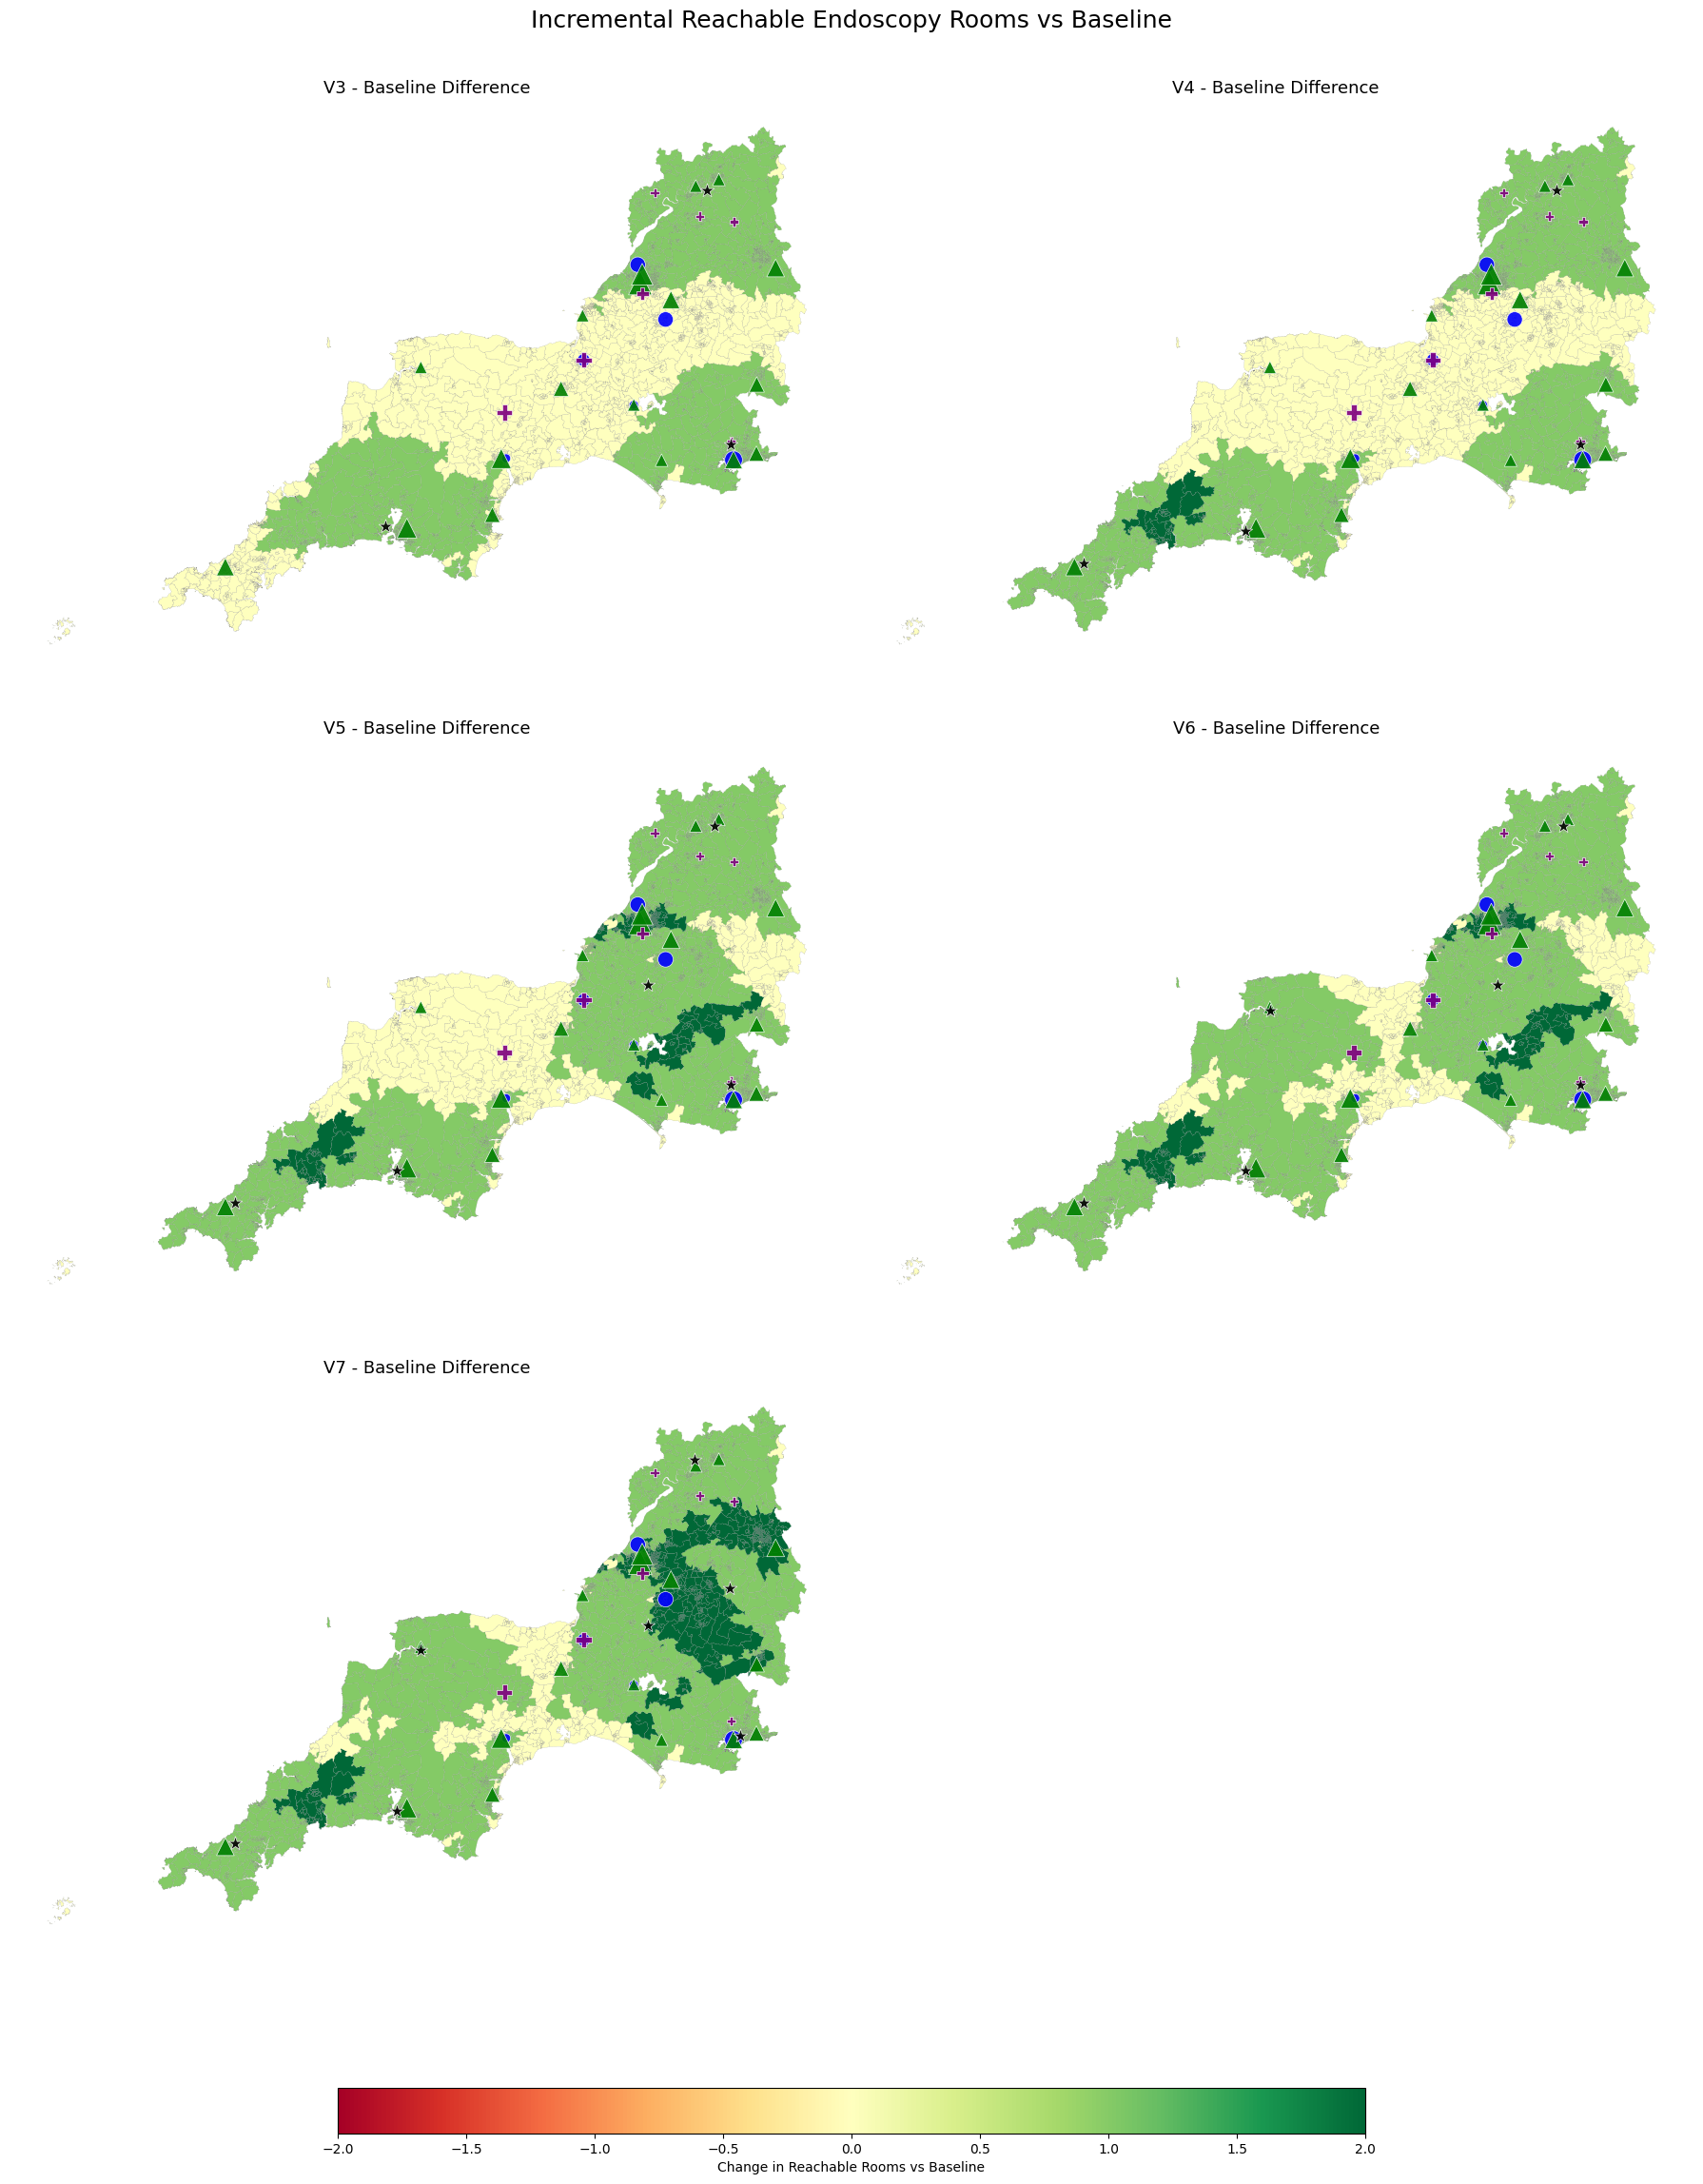

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D
import numpy as np

# Step 1: Calculate reachable rooms for Baseline and all scenarios
reachable_by_scenario = {}
for scen, df in travel_ready_by_scenario.items():
    reachable_rooms = (
        df.groupby("origin_name", as_index=False)["rooms_at_destination"]
        .sum()
        .rename(columns={"origin_name": "lsoa21cd", "rooms_at_destination": "reachable_rooms_60min"})
    )
    reachable_by_scenario[scen] = reachable_rooms

# Step 2: Compute difference vs Baseline for V3–V7 only
diff_by_scenario = {}
baseline = reachable_by_scenario["Baseline"]

for scen in ["V3", "V4", "V5", "V6", "V7"]:
    diff = baseline.merge(reachable_by_scenario[scen], on="lsoa21cd", how="outer", suffixes=('_base', '_scen')).fillna(0)
    diff["diff_rooms"] = diff["reachable_rooms_60min_scen"] - diff["reachable_rooms_60min_base"]
    diff_by_scenario[scen] = diff[["lsoa21cd", "diff_rooms"]]

# Step 3: Determine shared colour scale for differences
all_diffs = np.concatenate([df["diff_rooms"].values for df in diff_by_scenario.values()])
vmax = np.percentile(np.abs(all_diffs), 99)
vmin = -vmax

# Step 4: Setup 3x2 plot grid (last panel empty)
fig, axes = plt.subplots(3, 2, figsize=(18, 24))
axes = axes.flatten()

marker_styles = [
    ("CDC", "blue", "o"),
    ("Acute", "green", "^"),
    ("Community", "purple", "P"),
    ("Proposed", "black", "*")
]

scenarios = ["V3", "V4", "V5", "V6", "V7"]

for i, scen in enumerate(scenarios):
    ax = axes[i]
    diff_map = lsoa_gdf[["lsoa21cd", "geometry"]].merge(diff_by_scenario[scen], on="lsoa21cd", how="left").fillna(0)
    
    # Plot difference choropleth
    diff_map.plot(
        column="diff_rooms",
        cmap="RdYlGn",
        linewidth=0.1,
        edgecolor="grey",
        legend=False,
        vmin=vmin,
        vmax=vmax,
        ax=ax
    )
    
    # Overlay facilities including Proposed sites
    fac_gdf = facilities_by_scenario[scen]
    fac_gdf["geometry"] = fac_gdf["geometry"].centroid
    for label, colour, marker in marker_styles:
        subset = fac_gdf[fac_gdf["source"] == label]
        if not subset.empty:
            size = 120 if label == "Proposed" else subset["Endoscopy Rooms"] * 45
            subset.plot(
                ax=ax,
                color=colour,
                markersize=size,
                marker=marker,
                label=label,
                alpha=0.9,
                edgecolor="white",
                linewidth=0.5
            )
    ax.set_title(f"{scen} - Baseline Difference", fontsize=13)
    ax.axis("off")

# Hide last empty subplot
axes[-1].axis("off")

# Step 5: Add shared colourbar for difference
cax = fig.add_axes([0.2, 0.05, 0.6, 0.02])
sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax, orientation="horizontal", label="Change in Reachable Rooms vs Baseline")

plt.tight_layout(rect=[0, 0.1, 1, 0.97])
plt.suptitle("Incremental Reachable Endoscopy Rooms vs Baseline", fontsize=18)
plt.show()


In [10]:
# ----------------------------------------------------------
# Step 6 – Competition-Adjusted Rooms per 100k (Catchment Pressure, <60 min)
# ----------------------------------------------------------

def classify_access(x):
    if pd.isna(x) or x == 0:
        return "No Access"
    elif x < 3.5:
        return "Low"
    elif x < 4.0:
        return "Marginal"
    else:
        return "Adequate"


competition_access_by_scenario = {}

for scen, travel_df_60 in travel_ready_by_scenario.items():
    print(f"\nProcessing competition-adjusted access for {scen}...")

    # 6.1 – Total population competing for each facility (destination LSOA)
    facility_pop = (
        travel_df_60
        .groupby("destination_name", as_index=False)["pop_50_74"]
        .sum()
        .rename(columns={"pop_50_74": "competing_pop_50_74"})
    )

    # 6.2 – Merge competing population back into travel matrix
    merged = travel_df_60.merge(
        facility_pop,
        on="destination_name",
        how="left"
    )

    # 6.3 – Compute facility's contribution adjusted by competing demand (per 100k pop)
    merged["room_contrib_per_100k"] = (
        merged["rooms_at_destination"] /
        merged["competing_pop_50_74"].replace(0, np.nan)
    ) * 100_000

    # 6.4 – Aggregate competition-adjusted access score per origin LSOA
    competition_access = (
        merged
        .groupby("origin_name", as_index=False)["room_contrib_per_100k"]
        .sum()
        .rename(columns={
            "origin_name": "lsoa21cd",
            "room_contrib_per_100k": "rooms_per_100k_competition"
        })
    )

    # 6.5 – Classify access tier
    competition_access["access_flag"] = competition_access["rooms_per_100k_competition"].apply(classify_access)

    # Store per scenario
    competition_access_by_scenario[scen] = competition_access

    # 6.6 – Summary printout
    print(f"  Completed {scen}: {competition_access.shape[0]} LSOAs scored")
    display(competition_access.head())
    display(competition_access["access_flag"].value_counts())



Processing competition-adjusted access for Baseline...
  Completed Baseline: 3419 LSOAs scored


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01014014,1.730148,Low
1,E01014031,2.690179,Low
2,E01014032,1.518772,Low
3,E01014036,2.155768,Low
4,E01014057,1.730148,Low


access_flag
Low         1609
Adequate    1386
Marginal     424
Name: count, dtype: int64


Processing competition-adjusted access for V3...
  Completed V3: 3436 LSOAs scored


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01014014,1.917119,Low
1,E01014031,2.877150,Low
2,E01014032,1.705743,Low
3,E01014036,2.342738,Low
4,E01014057,1.917119,Low


access_flag
Adequate    1594
Low         1272
Marginal     570
Name: count, dtype: int64


Processing competition-adjusted access for V4...
  Completed V4: 3433 LSOAs scored


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01014014,1.917119,Low
1,E01014031,2.877150,Low
2,E01014032,1.705743,Low
3,E01014036,2.342738,Low
4,E01014057,1.917119,Low


access_flag
Adequate    1593
Low         1238
Marginal     602
Name: count, dtype: int64


Processing competition-adjusted access for V5...
  Completed V5: 3433 LSOAs scored


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01014014,1.921358,Low
1,E01014031,2.881389,Low
2,E01014032,1.709982,Low
3,E01014036,2.346977,Low
4,E01014057,1.921358,Low


access_flag
Adequate    1675
Low         1215
Marginal     543
Name: count, dtype: int64


Processing competition-adjusted access for V6...
  Completed V6: 3435 LSOAs scored


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01014014,1.921358,Low
1,E01014031,2.881389,Low
2,E01014032,1.709982,Low
3,E01014036,2.346977,Low
4,E01014057,1.921358,Low


access_flag
Adequate    1733
Low         1157
Marginal     545
Name: count, dtype: int64


Processing competition-adjusted access for V7...
  Completed V7: 3435 LSOAs scored


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01014014,1.931936,Low
1,E01014031,2.891966,Low
2,E01014032,1.720560,Low
3,E01014036,2.357555,Low
4,E01014057,1.931936,Low


access_flag
Adequate    1767
Low         1097
Marginal     571
Name: count, dtype: int64

In [12]:
def classify_access_extended(x):
    if pd.isna(x) or x == 0:
        return "No Access"
    elif x < 3.5:
        return "Low"
    elif x < 4.0:
        return "Marginal"
    else:
        return "Adequate"

competition_access_extended_by_scenario = {}

for scen, comp_access in competition_access_by_scenario.items():
    extended = lsoa_gdf[["lsoa21cd"]].merge(
        comp_access, on="lsoa21cd", how="left"
    )
    extended["rooms_per_100k_competition"] = extended["rooms_per_100k_competition"].fillna(0)
    extended["access_flag"] = extended["rooms_per_100k_competition"].apply(classify_access_extended)
    
    competition_access_extended_by_scenario[scen] = extended
    
    print(f"\n{scen} - Extended competition access (all LSOAs):")
    display(extended.head())
    display(extended["access_flag"].value_counts())



Baseline - Extended competition access (all LSOAs):


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01020484,2.295663,Low
1,E01020481,0.999220,Low
2,E01020482,2.295663,Low
3,E01020479,2.295663,Low
4,E01020478,2.295663,Low


access_flag
Low          1609
Adequate     1386
Marginal      424
No Access      32
Name: count, dtype: int64


V3 - Extended competition access (all LSOAs):


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01020484,2.639296,Low
1,E01020481,1.342853,Low
2,E01020482,2.639296,Low
3,E01020479,2.639296,Low
4,E01020478,2.639296,Low


access_flag
Adequate     1594
Low          1272
Marginal      570
No Access      15
Name: count, dtype: int64


V4 - Extended competition access (all LSOAs):


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01020484,2.639296,Low
1,E01020481,1.342853,Low
2,E01020482,2.639296,Low
3,E01020479,2.639296,Low
4,E01020478,2.639296,Low


access_flag
Adequate     1593
Low          1238
Marginal      602
No Access      18
Name: count, dtype: int64


V5 - Extended competition access (all LSOAs):


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01020484,2.639296,Low
1,E01020481,1.342853,Low
2,E01020482,2.639296,Low
3,E01020479,2.639296,Low
4,E01020478,2.639296,Low


access_flag
Adequate     1675
Low          1215
Marginal      543
No Access      18
Name: count, dtype: int64


V6 - Extended competition access (all LSOAs):


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01020484,2.639296,Low
1,E01020481,1.342853,Low
2,E01020482,2.639296,Low
3,E01020479,2.639296,Low
4,E01020478,2.639296,Low


access_flag
Adequate     1733
Low          1157
Marginal      545
No Access      16
Name: count, dtype: int64


V7 - Extended competition access (all LSOAs):


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01020484,2.681524,Low
1,E01020481,1.385081,Low
2,E01020482,2.681524,Low
3,E01020479,2.681524,Low
4,E01020478,2.681524,Low


access_flag
Adequate     1767
Low          1097
Marginal      571
No Access      16
Name: count, dtype: int64

In [13]:
lsoa_access_gdf_by_scenario = {}

for scen, extended in competition_access_extended_by_scenario.items():
    merged = lsoa_gdf.merge(extended, on="lsoa21cd", how="left")
    lsoa_access_gdf_by_scenario[scen] = merged
    print(f"\n{scen} - GeoDataFrame merged with competition access:")
    display(merged[["lsoa21cd", "rooms_per_100k_competition", "access_flag"]].head())



Baseline - GeoDataFrame merged with competition access:


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01020484,2.295663,Low
1,E01020481,0.999220,Low
2,E01020482,2.295663,Low
3,E01020479,2.295663,Low
4,E01020478,2.295663,Low



V3 - GeoDataFrame merged with competition access:


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01020484,2.639296,Low
1,E01020481,1.342853,Low
2,E01020482,2.639296,Low
3,E01020479,2.639296,Low
4,E01020478,2.639296,Low



V4 - GeoDataFrame merged with competition access:


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01020484,2.639296,Low
1,E01020481,1.342853,Low
2,E01020482,2.639296,Low
3,E01020479,2.639296,Low
4,E01020478,2.639296,Low



V5 - GeoDataFrame merged with competition access:


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01020484,2.639296,Low
1,E01020481,1.342853,Low
2,E01020482,2.639296,Low
3,E01020479,2.639296,Low
4,E01020478,2.639296,Low



V6 - GeoDataFrame merged with competition access:


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01020484,2.639296,Low
1,E01020481,1.342853,Low
2,E01020482,2.639296,Low
3,E01020479,2.639296,Low
4,E01020478,2.639296,Low



V7 - GeoDataFrame merged with competition access:


,lsoa21cd,rooms_per_100k_competition,access_flag
0,E01020484,2.681524,Low
1,E01020481,1.385081,Low
2,E01020482,2.681524,Low
3,E01020479,2.681524,Low
4,E01020478,2.681524,Low


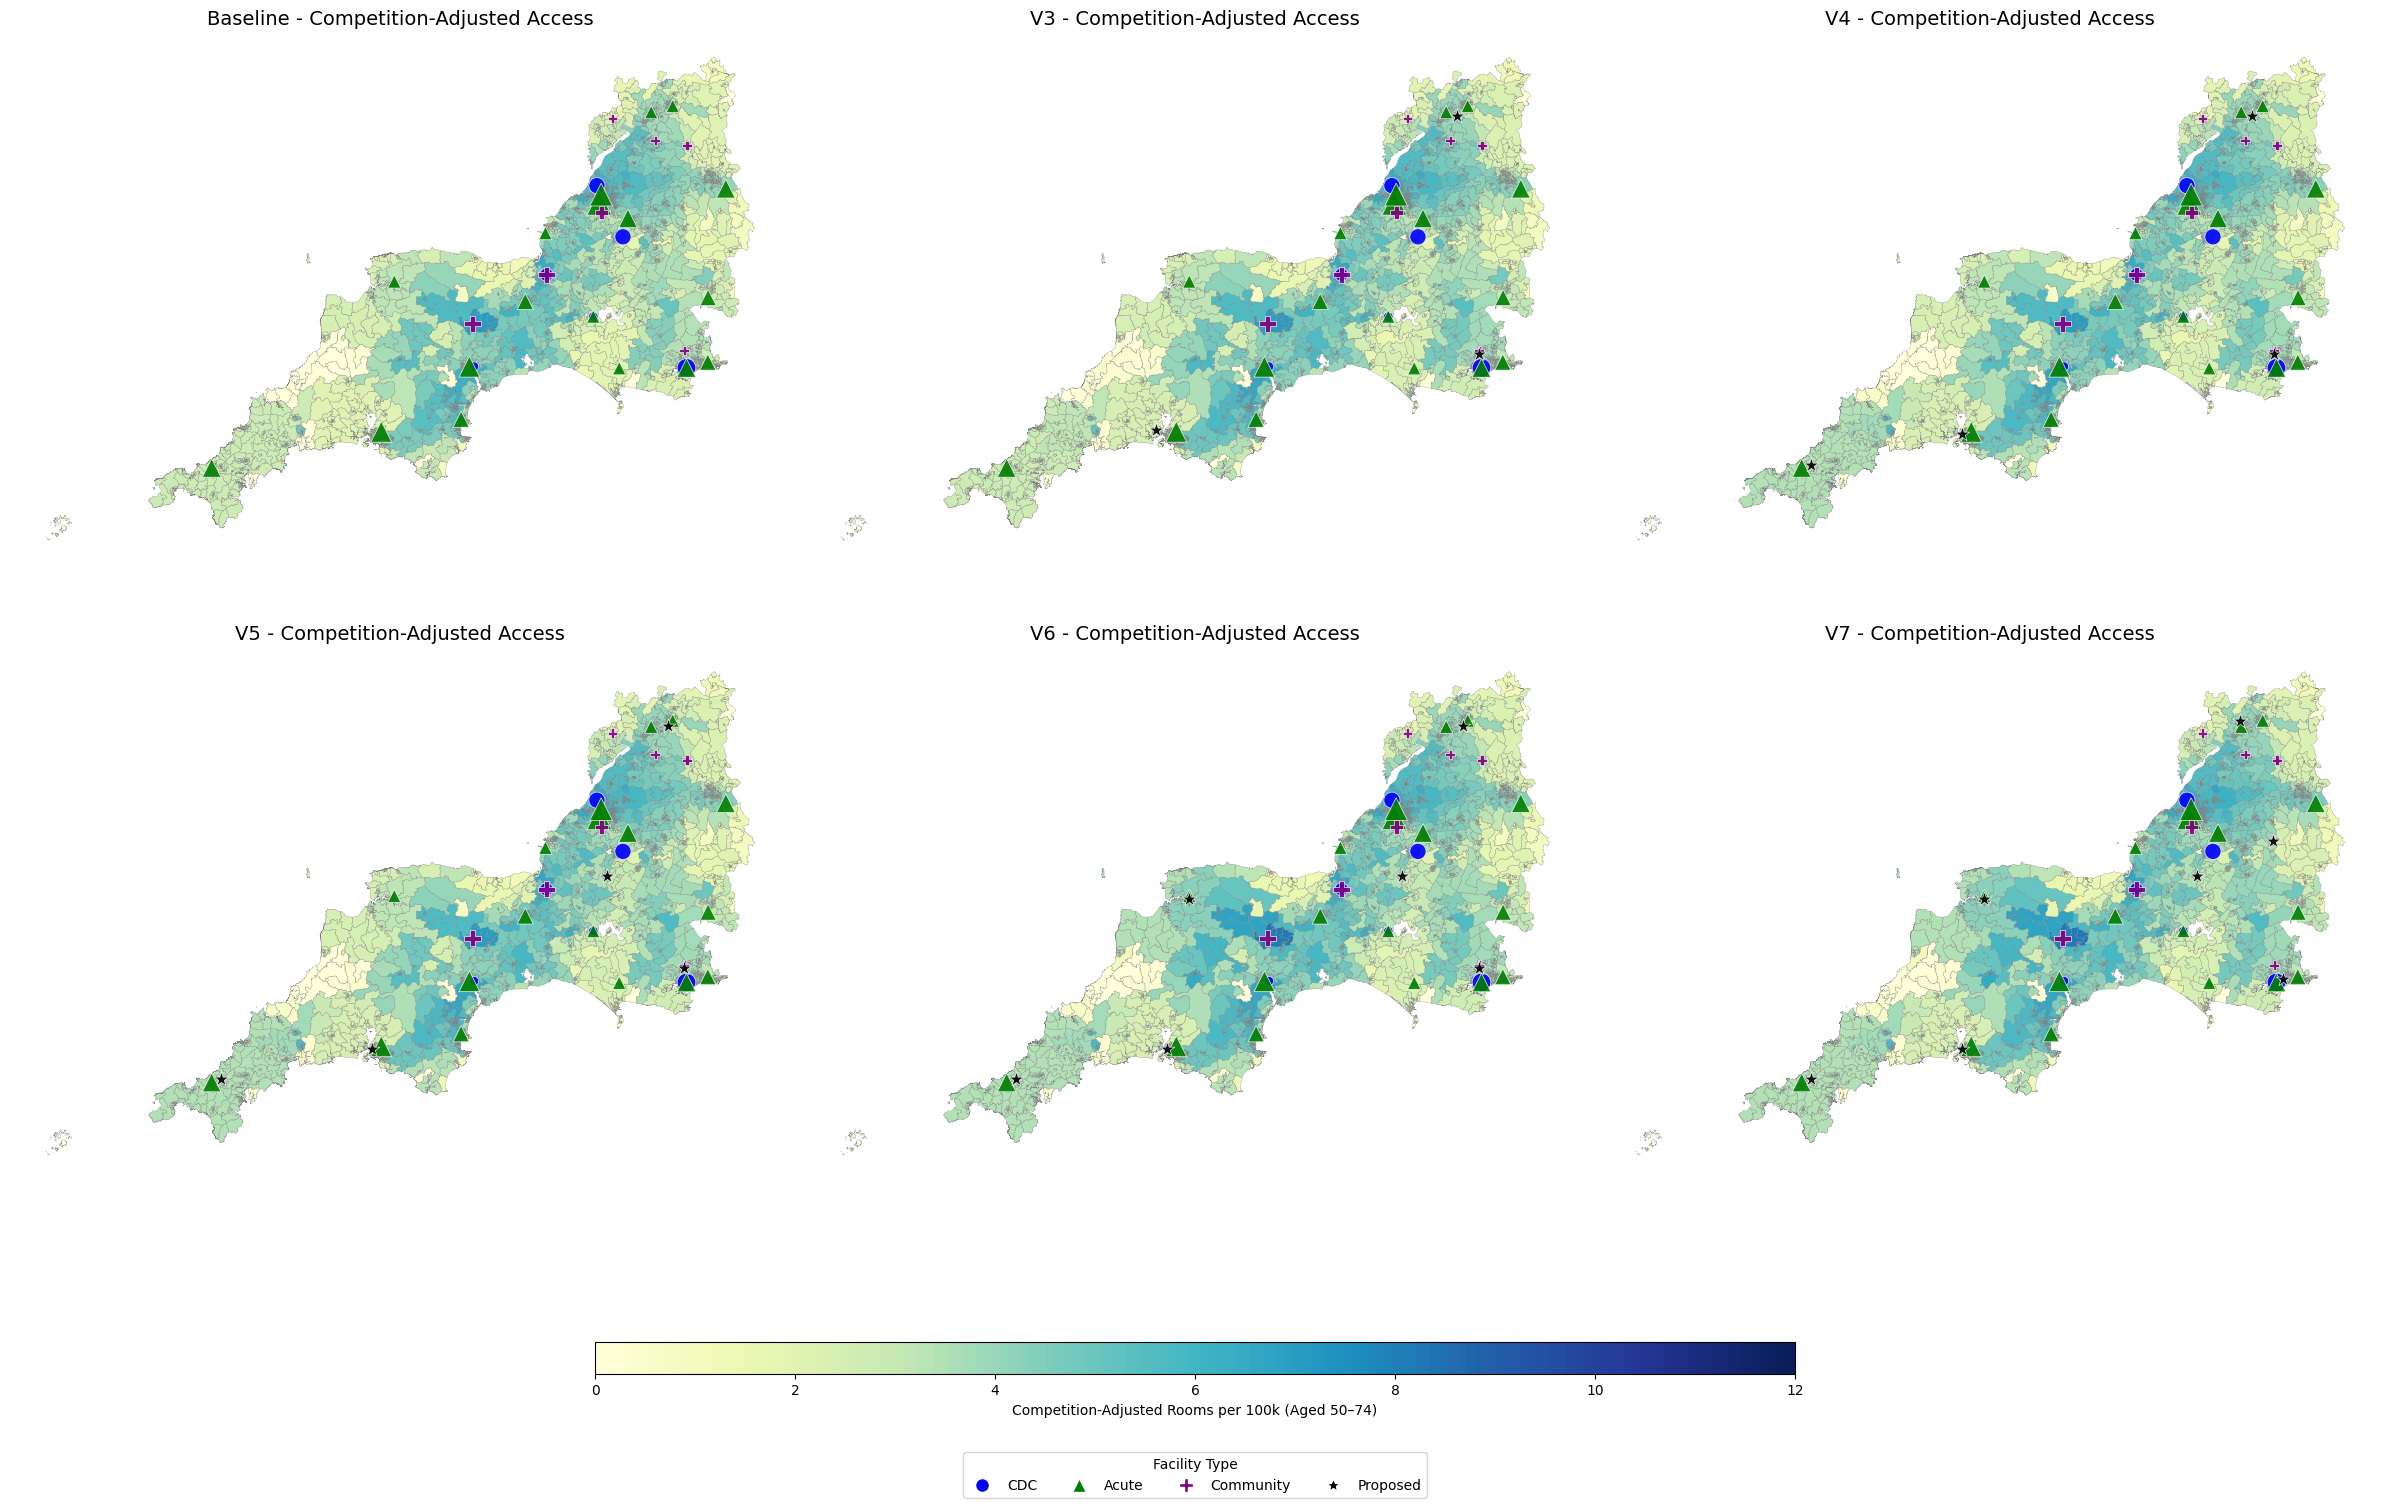

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D

# Define scenarios and marker styles
scenarios = ["Baseline", "V3", "V4", "V5", "V6", "V7"]
marker_styles = [
    ("CDC", "blue", "o"),
    ("Acute", "green", "^"),
    ("Community", "purple", "P"),
    ("Proposed", "black", "*")
]

# Determine global min/max for color scale
vmin = 0
vmax = 12  # or compute max from your data for dynamic scaling

# Create figure and axes grid
fig, axes = plt.subplots(2, 3, figsize=(24, 16))
axes = axes.flatten()

for i, scen in enumerate(scenarios):
    ax = axes[i]
    gdf = lsoa_access_gdf_by_scenario[scen]

    # Plot competition-adjusted rooms per 100k
    gdf.plot(
        column="rooms_per_100k_competition",
        cmap="YlGnBu",
        linewidth=0.2,
        edgecolor="grey",
        legend=False,  # We will add a single shared legend below
        vmin=vmin,
        vmax=vmax,
        ax=ax
    )

    # Overlay facility markers
    fac_gdf = facilities_by_scenario[scen]
    fac_gdf["geometry"] = fac_gdf["geometry"].centroid  # Ensure centroids for plotting
    for label, colour, marker in marker_styles:
        subset = fac_gdf[fac_gdf["source"] == label]
        if not subset.empty:
            size = 120 if label == "Proposed" else subset["Endoscopy Rooms"] * 45
            subset.plot(
                ax=ax,
                color=colour,
                markersize=size,
                marker=marker,
                label=label,
                alpha=0.9,
                edgecolor="white",
                linewidth=0.5
            )

    ax.set_title(f"{scen} - Competition-Adjusted Access", fontsize=14)
    ax.axis("off")

# Remove any unused axes (in case there are fewer than 6 scenarios)
for j in range(len(scenarios), len(axes)):
    axes[j].axis("off")

# Create a single colorbar for all plots
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap="YlGnBu", norm=Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cbar_ax, orientation="horizontal", label="Competition-Adjusted Rooms per 100k (Aged 50–74)")

# Create a single legend for facility markers
legend_elements = [Line2D([0], [0], marker=marker, color='w', label=label,
                          markerfacecolor=colour, markersize=10, markeredgecolor='white')
                   for label, colour, marker in marker_styles]
fig.legend(handles=legend_elements, loc='lower center', ncol=len(marker_styles), title='Facility Type')

plt.tight_layout(rect=[0, 0.12, 1, 1])
plt.show()


In [16]:
# Step 1: Descriptive summary statistics per scenario
summary_stats = {}

for scen, comp_access in competition_access_by_scenario.items():
    desc = comp_access["rooms_per_100k_competition"].describe(percentiles=[0.25, 0.5, 0.75])
    summary_stats[scen] = {
        "mean": desc["mean"],
        "median": desc["50%"],
        "iqr": desc["75%"] - desc["25%"],
        "count": desc["count"],
        "min": desc["min"],
        "max": desc["max"],
        "std": desc["std"]
    }
    print(f"\n{scen} Summary:")
    print(desc[["count", "min", "25%", "50%", "75%", "max", "mean", "std"]])



Baseline Summary:
count    3419.000000
min         0.230103
25%         2.790664
50%         3.698153
75%         4.618591
max         7.836887
mean        3.761326
std         1.205418
Name: rooms_per_100k_competition, dtype: float64

V3 Summary:
count    3436.000000
min         0.363678
25%         3.091598
50%         3.763902
75%         4.732144
max         8.200565
mean        3.903186
std         1.225458
Name: rooms_per_100k_competition, dtype: float64

V4 Summary:
count    3433.000000
min         0.230103
25%         3.206271
50%         3.779120
75%         4.732144
max         7.836887
mean        3.956541
std         1.195588
Name: rooms_per_100k_competition, dtype: float64

V5 Summary:
count    3433.000000
min         0.230103
25%         3.239143
50%         3.872519
75%         4.807600
max         7.836887
mean        4.013433
std         1.215812
Name: rooms_per_100k_competition, dtype: float64

V6 Summary:
count    3435.000000
min         0.230103
25%         3.41634

In [17]:
# Step 2: Population-weighted mean rooms_per_100k_competition per scenario

pop_weighted_means = {}

for scen, comp_access in competition_access_by_scenario.items():
    merged = comp_access.merge(lsoa_pop[["lsoa21cd", "pop_50_74"]], on="lsoa21cd", how="left")
    weighted_mean = (merged["rooms_per_100k_competition"] * merged["pop_50_74"]).sum() / merged["pop_50_74"].sum()
    pop_weighted_means[scen] = weighted_mean
    print(f"{scen}: Population-weighted mean rooms per 100k = {weighted_mean:.3f}")


Baseline: Population-weighted mean rooms per 100k = 3.695
V3: Population-weighted mean rooms per 100k = 3.831
V4: Population-weighted mean rooms per 100k = 3.890
V5: Population-weighted mean rooms per 100k = 3.943
V6: Population-weighted mean rooms per 100k = 3.993
V7: Population-weighted mean rooms per 100k = 4.046


In [18]:
# Step 3: Count and proportion of LSOAs per access_flag by scenario

for scen, comp_access in competition_access_by_scenario.items():
    counts = comp_access["access_flag"].value_counts()
    props = comp_access["access_flag"].value_counts(normalize=True)
    print(f"\n{scen} Access Flag Counts:")
    print(counts)
    print(f"\n{scen} Access Flag Proportions:")
    print(props)



Baseline Access Flag Counts:
access_flag
Low         1609
Adequate    1386
Marginal     424
Name: count, dtype: int64

Baseline Access Flag Proportions:
access_flag
Low         0.470605
Adequate    0.405382
Marginal    0.124013
Name: proportion, dtype: float64

V3 Access Flag Counts:
access_flag
Adequate    1594
Low         1272
Marginal     570
Name: count, dtype: int64

V3 Access Flag Proportions:
access_flag
Adequate    0.463912
Low         0.370198
Marginal    0.165891
Name: proportion, dtype: float64

V4 Access Flag Counts:
access_flag
Adequate    1593
Low         1238
Marginal     602
Name: count, dtype: int64

V4 Access Flag Proportions:
access_flag
Adequate    0.464026
Low         0.360618
Marginal    0.175357
Name: proportion, dtype: float64

V5 Access Flag Counts:
access_flag
Adequate    1675
Low         1215
Marginal     543
Name: count, dtype: int64

V5 Access Flag Proportions:
access_flag
Adequate    0.487911
Low         0.353918
Marginal    0.158171
Name: proportion, dty

In [19]:
# Step 4: Access Flag Transition Matrix from Baseline to each Scenario

baseline_flags = competition_access_by_scenario["Baseline"][["lsoa21cd", "access_flag"]].rename(columns={"access_flag": "baseline_flag"})

for scen in ["V3", "V4", "V5", "V6", "V7"]:
    scenario_flags = competition_access_by_scenario[scen][["lsoa21cd", "access_flag"]].rename(columns={"access_flag": "scenario_flag"})
    merged_flags = baseline_flags.merge(scenario_flags, on="lsoa21cd")
    
    transition = pd.crosstab(merged_flags["baseline_flag"], merged_flags["scenario_flag"], normalize='index')
    print(f"\nTransition matrix Baseline → {scen} (row = baseline):")
    display(transition)



Transition matrix Baseline → V3 (row = baseline):


scenario_flag,Adequate,Low,Marginal
baseline_flag,,,
Adequate,1.000000,0.000000,0.000000
Low,0.000000,0.779988,0.220012
Marginal,0.490566,0.000000,0.509434



Transition matrix Baseline → V4 (row = baseline):


scenario_flag,Adequate,Low,Marginal
baseline_flag,,,
Adequate,1.000000,0.000000,0.000000
Low,0.000000,0.760721,0.239279
Marginal,0.488208,0.000000,0.511792



Transition matrix Baseline → V5 (row = baseline):


scenario_flag,Adequate,Low,Marginal
baseline_flag,,,
Adequate,1.000000,0.000000,0.000000
Low,0.000622,0.746426,0.252952
Marginal,0.679245,0.000000,0.320755



Transition matrix Baseline → V6 (row = baseline):


scenario_flag,Adequate,Low,Marginal
baseline_flag,,,
Adequate,1.000000,0.000000,0.000000
Low,0.036047,0.709136,0.254817
Marginal,0.681604,0.000000,0.318396



Transition matrix Baseline → V7 (row = baseline):


scenario_flag,Adequate,Low,Marginal
baseline_flag,,,
Adequate,1.000000,0.000000,0.000000
Low,0.036047,0.671846,0.292107
Marginal,0.761792,0.000000,0.238208
